### Question: What is the safest type of intersection?

Let's see how accidents are splitted based on the place of the event and see where we can feel to be the safest.

First step before any data analysis is to import required libraries and data. Any information required to understand columns is available here: https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

caracteristics = pd.read_csv('data/caracteristics.csv', encoding='latin1')

D:\Programy\anaconda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
caracteristics.head()
caracteristics.shape

(839985, 16)

Let's change the values in intersection column from numbers to categorical values, below the look-up for development.
* 1 - Out of intersection
* 2 - Intersection in X
* 3 - Intersection in T
* 4 - Intersection in Y
* 5 - Intersection with more than 4 branches
* 6 - Giratory
* 7 - Place
* 8 - Level crossing
* 9 - Other intersection

But first let's check for missing values in 'int' (intersection) column.

In [21]:
caracteristics.columns[caracteristics.isna().sum() != 0]

Index(['atm', 'col', 'com', 'adr', 'gps', 'lat', 'long'], dtype='object')

So it looks like 'int' column is not having missing values, which is super for us in this case. Let's go with renaming values in 'int' column.

In [22]:
int_dict = {
    '1': 'Out of intersection',
    '2': 'X intersection',
    '3': 'T intersection',
    '4': 'Y intersection',
    '5': 'More than 4 branches intersection',
    '6': 'Giratory',
    '7': 'Place',
    '8': 'Level crossing',
    '9': 'Other'

}
caracteristics['int'] = caracteristics['int'].astype(str) 
caracteristics['int'] = caracteristics['int'].replace(int_dict)
caracteristics['int'] = pd.Categorical(caracteristics['int'], list(int_dict.values()))
caracteristics.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,Out of intersection,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,Giratory,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,Out of intersection,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,Out of intersection,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,T intersection,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


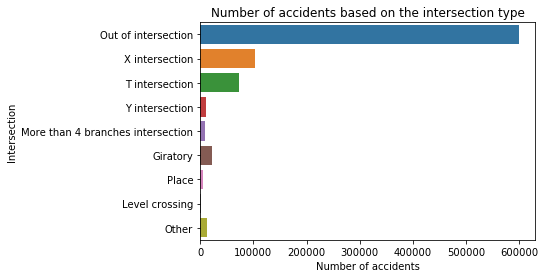

In [28]:
plt.clf()
ax = sns.countplot(y = 'int', data=caracteristics)
ax.set_title('Number of accidents based on the intersection type')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Intersection')
plt.show()

So it looks like the biggest number of accidents is not on the intersection, but out of it. Let's see how is with casualties on each type of intersection.

In [25]:
users = pd.read_csv('data/users.csv', encoding='latin1')
users['grav']= users['grav'].astype(str) 
users['grav'] = users['grav'].replace({'1': 'unscathed', '2': 'killed', '3': 'hospitalized', '4': 'light injury'})
users['grav'] = pd.Categorical(users['grav'], ['unscathed', 'light injury', 'hospitalized', 'killed'])

dataset = pd.concat([caracteristics, users],axis=1)
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,2.016000e+11,16.0,2.0,1.0,1445.0,1.0,2.0,Out of intersection,8.0,3.0,...,1,unscathed,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,2.016000e+11,16.0,3.0,16.0,1800.0,1.0,2.0,Giratory,1.0,6.0,...,1,hospitalized,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,2.016000e+11,16.0,7.0,13.0,1900.0,1.0,1.0,Out of intersection,1.0,6.0,...,1,hospitalized,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,2.016000e+11,16.0,8.0,15.0,1930.0,2.0,2.0,Out of intersection,7.0,3.0,...,2,hospitalized,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,2.016000e+11,16.0,12.0,23.0,1100.0,1.0,2.0,T intersection,1.0,3.0,...,2,hospitalized,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


<Figure size 432x288 with 0 Axes>

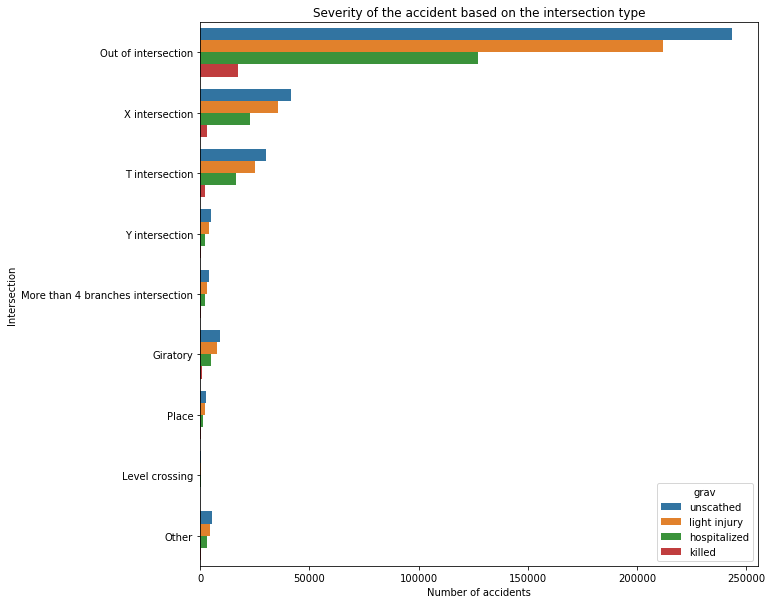

In [26]:
plt.clf()
plt.figure(figsize=(10,10))
ax = sns.countplot(y = 'int', hue='grav', data=dataset)
ax.set_title('Severity of the accident based on the intersection type')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Intersection')
plt.show()